In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2
import numpy as np

In [2]:
# 1. Cargar los datos de entrenamiento (en este caso, la base de datos MNIST)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Normalizar y redimensionar las imágenes para que estén en el rango [0, 1] y tengan el tamaño adecuado para la CNN
training_images = training_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

# Agregar una dimensión extra para indicar el número de canales (en este caso, solo 1 canal porque son imágenes en escala de grises)
training_images = np.expand_dims(training_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)



11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# 2. Definir y entrenar el modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5, batch_size=32)



Epoch 1/5
1875/1875 [==============================] - 59s 30ms/step - loss: 0.2115 - accuracy: 0.9342
Epoch 2/5
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0707 - accuracy: 0.9773
Epoch 3/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0513 - accuracy: 0.9839
Epoch 4/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0385 - accuracy: 0.9883
Epoch 5/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0306 - accuracy: 0.9902


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1/1 [==============================] - 0s 20ms/step


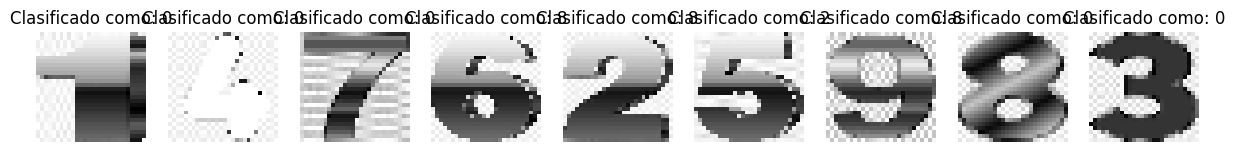

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ruta de la carpeta que contiene las imágenes
folder_path = '/content/drive/MyDrive/Datas Creadas 10/Numeros'  # Cambia esto por la ruta real de tu carpeta

# Listas para almacenar las imágenes procesadas y sus etiquetas
images = []
predicted_classes = []

# Iterar sobre todos los archivos en la carpeta
for filename in os.listdir(folder_path):
    if filename.endswith('.PNG'):  # Filtrar solo archivos PNG
        image_path = os.path.join(folder_path, filename)

        # Leer y procesar la imagen
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image_resized = cv2.resize(image, (28, 28))  # Redimensionar
        image_normalized = image_resized.astype(np.float32) / 255.0  # Normalizar
        images.append(image_normalized)  # Almacenar imagen procesada

        # Aquí deberías incluir tu modelo de predicción
        predicted_class = model.predict(image_normalized.reshape(1, 28, 28, 1))  # Ejemplo de predicción
        predicted_classes.append(np.argmax(predicted_class))  # Obtener la clase predicha

# Mostrar todas las imágenes y sus resultados
num_images = len(images)
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Clasificado como: {predicted_classes[i]}")
    plt.axis('off')  # No mostrar los ejes

plt.show()  # Mostrar todas las imágenes

In [12]:
# 5. Obtener el resultado
print("La imagen fue clasificada como el dígito:", predicted_class)

La imagen fue clasificada como el dígito: [[0.4515732  0.01257187 0.21764673 0.00947608 0.04760445 0.00908076
  0.09871205 0.00185173 0.13374786 0.01773529]]
